<a href="https://colab.research.google.com/github/jamleston/fashion-app/blob/main/models_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Перетворення зображень у формат RGB (VGG16 очікує 3 канали)
train_images = tf.image.grayscale_to_rgb(tf.expand_dims(train_images, -1))
test_images = tf.image.grayscale_to_rgb(tf.expand_dims(test_images, -1))

In [ ]:
# Перетворення в float32 і нормалізація даних
train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

In [ ]:
# Зміна розміру зображень до 32x32 (найменший розмір, який підтримує VGG16)
train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

In [ ]:
# Завантаження VGG16 без верхніх шарів
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Заморожування перших шарів (виділення ознак)
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [ ]:
# Створення моделі
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='sigmoid')
])

In [ ]:
# Компіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Функція для зміни швидкості навчання
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return float(lr * np.exp(-0.1))

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# Тренування моделі
history = model.fit(train_images, train_labels, epochs=30,
                    validation_split=0.2,
                    batch_size=128,
                    callbacks=[callback])

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7474 - loss: 0.7008 - val_accuracy: 0.8755 - val_loss: 0.3357 - learning_rate: 0.0010
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8839 - loss: 0.3216 - val_accuracy: 0.8892 - val_loss: 0.2986 - learning_rate: 0.0010
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8970 - loss: 0.2824 - val_accuracy: 0.8992 - val_loss: 0.2810 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8989 - loss: 0.2588 - val_accuracy: 0.8875 - val_loss: 0.2977 - learning_rate: 0.0010
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8885 - loss: 0.2376 - val_accuracy: 0.8612 - val_loss: 0.2632 - learning_rate: 0.0010
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8597 - loss: 0.2129 - val_accuracy: 0.8612 - val_loss: 0.2660 - learning_rate: 9.0484e-04
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8912

In [ ]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')

313/313 - 5s - 16ms/step - accuracy: 0.8666 - loss: 0.9691

Точність на тестових даних: 0.866599977016449


In [ ]:
# Розморожування всіх шарів для тонкого налаштування
base_model.trainable = True

In [ ]:
# Перекомпіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Донавчання моделі
history_fine = model.fit(train_images, train_labels, epochs=15,
                         validation_split=0.2,
                         batch_size=64,
                         callbacks=[callback])

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.8606 - loss: 0.1947 - val_accuracy: 0.8624 - val_loss: 0.3644 - learning_rate: 0.0010
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8739 - loss: 0.1670 - val_accuracy: 0.8523 - val_loss: 0.3228 - learning_rate: 0.0010
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8877 - loss: 0.1538 - val_accuracy: 0.8558 - val_loss: 0.3636 - learning_rate: 0.0010
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8753 - loss: 0.1661 - val_accuracy: 0.8634 - val_loss: 0.3009 - learning_rate: 0.0010
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8781 - loss: 0.1582 - val_accuracy: 0.8130 - val_loss: 0.3709 - learning_rate: 0.0010
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8832 - loss: 0.1538 - val_accuracy: 0.8947 - val_loss: 0.3360 - learning_rate: 9.0484e-04
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8915

In [ ]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')

313/313 - 2s - 7ms/step - accuracy: 0.8881 - loss: 0.6998

Точність на тестових даних: 0.8881000280380249


In [ ]:
# Функція для побудови графіків
def plot_learning_curves(history, title_suffix=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Графік точності
    ax1.plot(history.history['accuracy'], label='Тренувальна вибірка')
    ax1.plot(history.history['val_accuracy'], label='Валідаційна вибірка')
    ax1.set_title(f'Точність моделі {title_suffix}')
    ax1.set_ylabel('Точність')
    ax1.set_xlabel('Епоха')
    ax1.legend()

    # Графік втрат
    ax2.plot(history.history['loss'], label='Тренувальна вибірка')
    ax2.plot(history.history['val_loss'], label='Валідаційна вибірка')
    ax2.set_title(f'Втрати моделі {title_suffix}')
    ax2.set_ylabel('Втрати')
    ax2.set_xlabel('Епоха')
    ax2.legend()

    plt.tight_layout()
    plt.show()

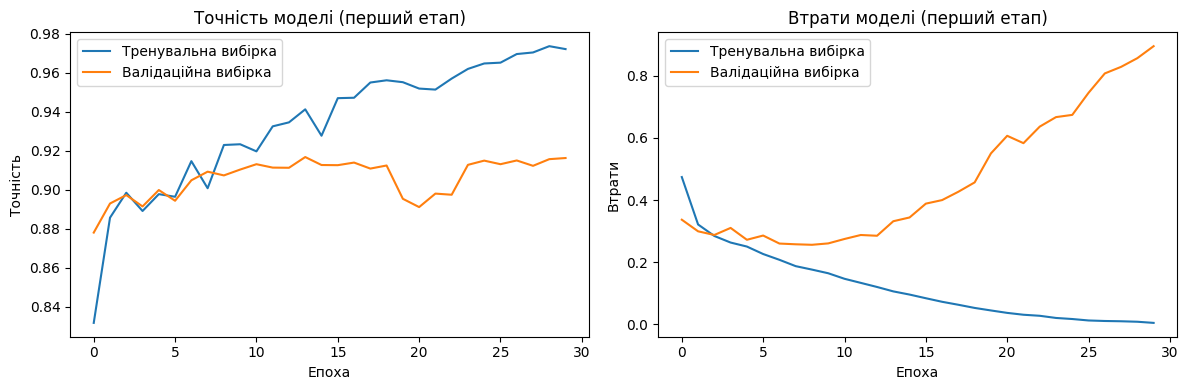

In [ ]:
# Побудова графіків для першого етапу навчання
plot_learning_curves(history, "(перший етап)")

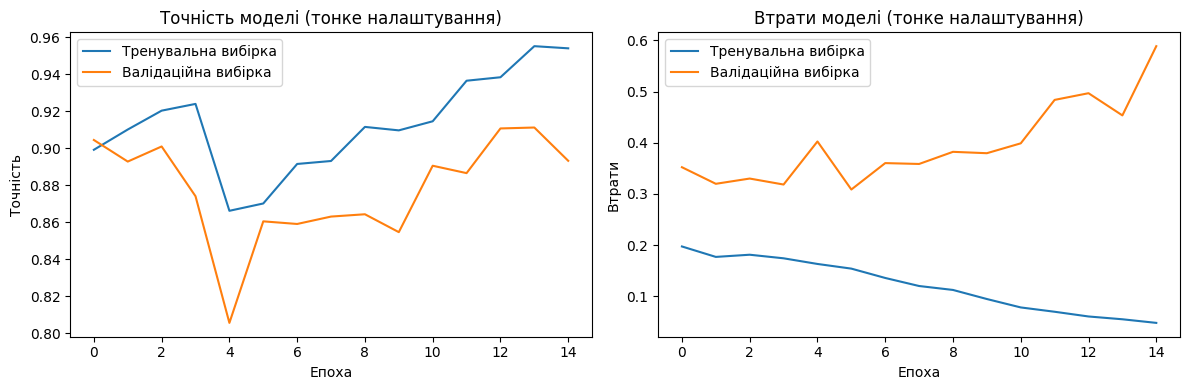

In [ ]:
# Побудова графіків для етапу тонкого налаштування
plot_learning_curves(history_fine, "(тонке налаштування)")

### Висновки

Точність багатошарової мережі з попереднього завдання склала 0,89. Точність згорткової мережі з використанням VGG16 в якості згорткової основи при аналогічних параметрах склала 0,92 після донавчання та 0,91 до донавчання.

In [ ]:
model.save('cnn_model.h5')
base_model.save('vgg16_model.h5')


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
!ls /content


cnn_model.h5  sample_data  vgg16_model.h5


In [ ]:
from google.colab import files

files.download('/content/cnn_model.h5')
files.download('/content/vgg16_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('vgg16_full_model.h5')

In [ ]:
from google.colab import files

files.download('/content/vgg16_full_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls /content

sample_data  vgg16_full_model.h5


In [ ]:
from google.colab import files

files.download('/content/vgg16_full_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>